In [107]:
import matplotlib.pyplot as plt
import seaborn as sns
from loguru import logger

from rocketshp import config

In [24]:
CATH_DIR = config.RAW_DATA_DIR / 'cath'
MDCATH_DIR = config.RAW_DATA_DIR / 'mdcath'

In [115]:
import pandas as pd

cath_headers = ["domain", "Class","Architecture","Topology","Superfamily","S35","S60","S95","S100","Counter","Domain Length","Structure Resolution"]
cath_domains = pd.read_csv(CATH_DIR / "cath-domain-list-v4_2_0.txt", sep=r"\s+", header=None, names=cath_headers, index_col=0, skiprows=16)
cath_domains["code"] = cath_domains[["Class","Architecture","Topology","Superfamily"]].map(str).apply(".".join, axis=1)
mdcath_files = list(MDCATH_DIR.glob("*.h5"))
logger.info(f"Read {len(mdcath_files)} mdcath files")
mdcath_domains = [i.stem.split("_")[-1] for i in mdcath_files if i.stem.split("_")[-1] in cath_domains.index]
mdcath_domains = cath_domains.loc[mdcath_domains]
logger.info(f"Found {len(mdcath_domains)} mdcath domains in CATH")
mdcath_domains.head()

2024-09-25 11:06:27.127 | INFO     | __main__:<module>:6 - Read 5185 mdcath files
2024-09-25 11:06:27.237 | INFO     | __main__:<module>:9 - Found 5184 mdcath domains in CATH


,Class,Architecture,Topology,Superfamily,S35,S60,S95,S100,Counter,Domain Length,Structure Resolution,code
domain,,,,,,,,,,,,
1vsaT01,2,40,240,10,4,1,1,2,1,91,1000.00,2.40.240.10
1xaiA01,3,40,50,1970,6,2,1,1,1,166,2.30,3.40.50.1970
4a5wB04,2,10,70,10,44,1,2,1,1,63,3.50,2.10.70.10
3zzoA00,3,30,70,2800,1,1,1,1,1,93,1.15,3.30.70.2800
1vw4400,3,40,30,10,325,1,1,1,1,138,1000.00,3.40.30.10


In [109]:
superfamily_counts = mdcath_domains[["Class","Architecture","Topology","Superfamily"]].groupby(["Class","Architecture","Topology","Superfamily"]).size().reset_index().rename(columns={0:"count"}).sort_values("count", ascending=False)
logger.info(f"Number of unique superfamilies: {len(superfamily_counts)}")
superfamily_counts.head()

2024-09-25 11:04:42.865 | INFO     | __main__:<module>:2 - Number of unique superfamilies: 2467


,Class,Architecture,Topology,Superfamily,count
1133,2,60,40,10,126
48,1,10,10,10,91
2045,3,40,50,300,57
1035,2,40,50,140,52
2028,3,40,30,10,47


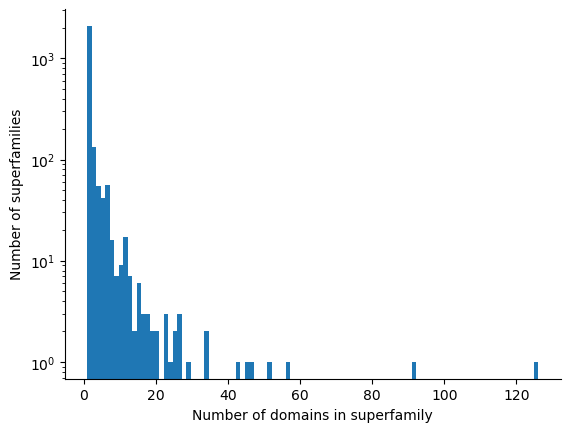

In [116]:
plt.hist(superfamily_counts["count"], bins=100)
plt.xlabel("Number of domains in superfamily")
plt.ylabel("Number of superfamilies")
plt.yscale("log")
sns.despine()
plt.show()